<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/HyperParameter_Tuning_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

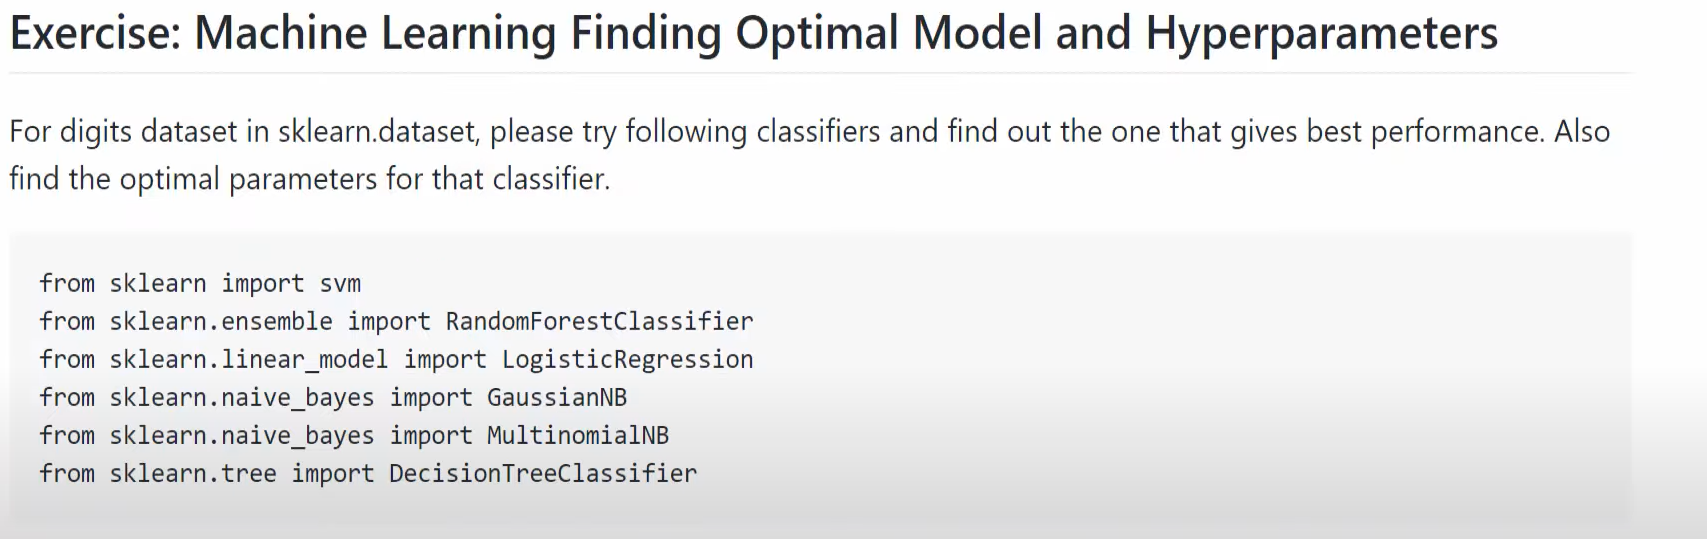

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [15]:
df =load_digits()
df1 = pd.DataFrame(df.data)
df1['Target'] = df.target
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [16]:
x= df1.drop(['Target'],axis=1)
y=df1.Target

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)


In [18]:
# trying all models with Default parameters 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier

lis =[SVC(),LogisticRegression(),RandomForestClassifier(),MultinomialNB(),GaussianNB(),DecisionTreeClassifier()]
for i in lis:
  model =i
  model.fit(xtrain,ytrain)
  score = model.score(xtest,ytest)
  model_name = type(model).__name__
  print("Model ", model_name,"has Score of ",score)


Model  SVC has Score of  0.9888888888888889
Model  LogisticRegression has Score of  0.9694444444444444
Model  RandomForestClassifier has Score of  0.9777777777777777
Model  MultinomialNB has Score of  0.8972222222222223
Model  GaussianNB has Score of  0.8777777777777778
Model  DecisionTreeClassifier has Score of  0.8277777777777777


In [12]:
# For SVM doing it in For loop
# doing it in for loop

from sklearn.model_selection import cross_val_score
lis =['linear','rbf','sigmoid','polynomial']
cost=[1,10,20,30]
for i in lis:
  for j in cost:
    cvscore=cross_val_score(SVC(kernel=i,C=j, gamma='auto'), x,y, cv=5).mean().round(2)
    print("Model with SVM Kernel",i,"cost as",j,"score is ",cvscore)

Model with SVM Kernel linear cost as 1 score is  0.95
Model with SVM Kernel linear cost as 10 score is  0.95
Model with SVM Kernel linear cost as 20 score is  0.95
Model with SVM Kernel linear cost as 30 score is  0.95
Model with SVM Kernel rbf cost as 1 score is  0.45
Model with SVM Kernel rbf cost as 10 score is  0.48
Model with SVM Kernel rbf cost as 20 score is  0.48
Model with SVM Kernel rbf cost as 30 score is  0.48
Model with SVM Kernel sigmoid cost as 1 score is  0.1
Model with SVM Kernel sigmoid cost as 10 score is  0.1
Model with SVM Kernel sigmoid cost as 20 score is  0.1
Model with SVM Kernel sigmoid cost as 30 score is  0.1
Model with SVM Kernel polynomial cost as 1 score is  nan
Model with SVM Kernel polynomial cost as 10 score is  nan
Model with SVM Kernel polynomial cost as 20 score is  nan
Model with SVM Kernel polynomial cost as 30 score is  nan


In [19]:
# doing it using GridsearchCV
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear'],
   
} , cv=5,
    return_train_score=False
)

clf.fit(df.data,df.target)
clfdf= pd.DataFrame(clf.cv_results_)
clfdf.sort_values('mean_test_score', ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.042284,0.000759,0.012298,0.000528,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
3,0.043114,0.002371,0.012126,0.000252,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
5,0.041447,0.001670,0.011932,0.000505,20,linear,"{'C': 20, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.532423,0.002914,0.067245,0.001081,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
4,0.531142,0.004097,0.067924,0.001915,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
0,0.539611,0.005912,0.069273,0.003518,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6


In [20]:
clfdf[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,10,rbf,0.476366
3,10,linear,0.947697
4,20,rbf,0.476366
5,20,linear,0.947697


In [21]:
# now finding out the best model
model_params = {
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C': [1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
        'LogisticRegresson':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [22]:
scores =[]
for model_name,mp in model_params.items():
  clf= GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(df.data,df.target)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
pd.DataFrame(scores)

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,RandomForest,0.902643,{'n_estimators': 10}
2,LogisticRegresson,0.922114,{'C': 1}
